<a href="https://colab.research.google.com/github/SnehaDebnath678/Face-Mask-Detection-using-Convolutional-Neural-Network-CNN-/blob/main/Face_Mask_Detection_using_Convolutional_Neural_Network_(CNN)_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install kaggle

In [40]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:00<00:00, 1.51GB/s]
100% 163M/163M [00:00<00:00, 1.45GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data		       kaggle.json  with_mask_988.jpg
face-mask-dataset.zip  sample_data  without_mask_976.jpg


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1192.jpg', 'with_mask_2510.jpg', 'with_mask_2193.jpg', 'with_mask_1005.jpg', 'with_mask_2037.jpg']
['with_mask_74.jpg', 'with_mask_2771.jpg', 'with_mask_1567.jpg', 'with_mask_133.jpg', 'with_mask_268.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_373.jpg', 'without_mask_3653.jpg', 'without_mask_731.jpg', 'without_mask_3466.jpg', 'without_mask_1332.jpg']
['without_mask_3630.jpg', 'without_mask_272.jpg', 'without_mask_1132.jpg', 'without_mask_425.jpg', 'without_mask_2912.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**


with mask --> 1

without mask --> 0


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

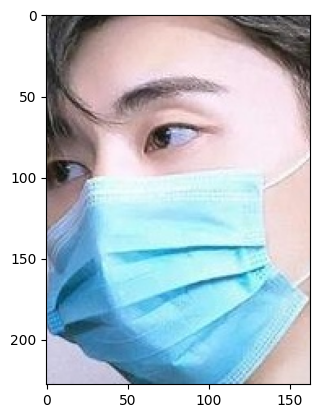

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

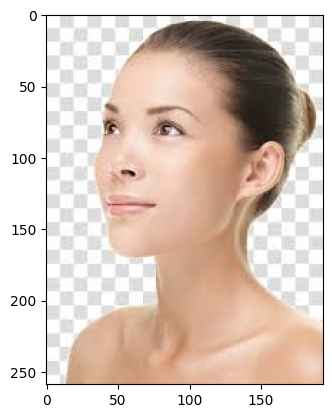

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.Resize the Images

2.Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 78,  59,  55],
        [ 77,  58,  54],
        [ 74,  55,  51],
        ...,
        [ 32,   8,   6],
        [ 41,  17,  15],
        [ 45,  21,  19]],

       [[ 77,  58,  54],
        [ 75,  56,  52],
        [ 75,  56,  52],
        ...,
        [ 30,   6,   4],
        [ 31,   7,   5],
        [ 32,   8,   5]],

       [[ 74,  55,  51],
        [ 75,  56,  52],
        [ 79,  60,  56],
        ...,
        [ 37,  15,  13],
        [ 31,   9,   7],
        [ 29,   6,   4]],

       ...,

       [[ 24,  21,   4],
        [ 23,  20,   3],
        [ 23,  20,   3],
        ...,
        [208, 170, 160],
        [213, 176, 165],
        [216, 179, 168]],

       [[ 25,  22,   5],
        [ 24,  21,   4],
        [ 23,  20,   3],
        ...,
        [211, 173, 162],
        [215, 177, 166],
        [218, 180, 169]],

       [[ 23,  20,   3],
        [ 22,  19,   2],
        [ 21,  18,   1],
        ...,
        [214, 176, 165],
        [218, 180, 169],
        [219, 181, 170]]], dtype=uint8)
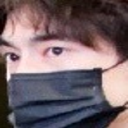

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 65,  65,  67],
        [ 62,  62,  64],
        [ 60,  60,  62],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 64,  64,  66],
        [ 61,  61,  63],
        [ 58,  58,  60],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 61,  61,  63],
        [ 58,  58,  60],
        [ 55,  55,  57],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 14,  14,  14]],

       ...,

       [[197, 162, 147],
        [177, 145, 131],
        [147, 118, 105],
        ...,
        [ 97,  87,  73],
        [105,  95,  80],
        [119, 109,  94]],

       [[207, 170, 154],
        [196, 162, 147],
        [171, 140, 127],
        ...,
        [102,  90,  76],
        [113, 101,  87],
        [131, 119, 105]],

       [[203, 167, 151],
        [200, 166, 151],
        [185, 154, 140],
        ...,
        [102,  90,  76],
        [115, 103,  89],
        [136, 124, 110]]], dtype=uint8)
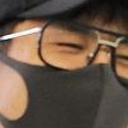

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.25490196, 0.25490196, 0.2627451 ],
        [0.24313725, 0.24313725, 0.25098039],
        [0.23529412, 0.23529412, 0.24313725],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.25098039, 0.25098039, 0.25882353],
        [0.23921569, 0.23921569, 0.24705882],
        [0.22745098, 0.22745098, 0.23529412],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.23921569, 0.23921569, 0.24705882],
        [0.22745098, 0.22745098, 0.23529412],
        [0.21568627, 0.21568627, 0.22352941],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       ...,

       [[0.77254902, 0.63529412, 0.57647059],
        [0.69411765, 0.56862745, 0.51372549],
        [0.57647059, 0

Building a Convolutional Neural Networks (CNN)

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
# building the CNN model

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2, activation='sigmoid') # Output layer for binary classification
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7305 - loss: 0.5563 - val_accuracy: 0.8628 - val_loss: 0.2917
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8819 - loss: 0.2814 - val_accuracy: 0.8992 - val_loss: 0.2365
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9129 - loss: 0.2273 - val_accuracy: 0.8909 - val_loss: 0.2795
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9258 - loss: 0.1965 - val_accuracy: 0.8975 - val_loss: 0.2928
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9403 - loss: 0.1549 - val_accuracy: 0.9339 - val_loss: 0.1981


Model Evaluation

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9266 - loss: 0.2044
Test Accuracy = 0.9285241365432739


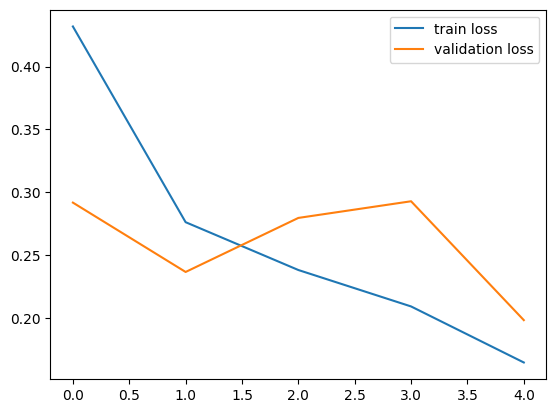

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


Predictive System

Path of the image to be predicted: /content/with_mask_988.jpg


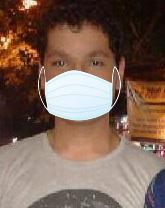

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
[[0.45710334 0.57798123]]
1
The person in the image is wearing a mask


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without_mask_976.jpg


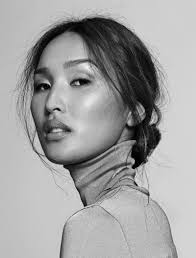

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.4891724  0.56954753]]
1
The person in the image is not wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 2:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')